In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.sparse import diags
plt.rcParams.update({'font.size': 14})

def plotresult(x,I,v,cin,Darray,Nt,title):
    colorwave = cm.plasma(np.linspace(0, 1, Nt))
    #fig = plt.figure(figsize = (15,5) )
    fig, ax = plt.subplots(figsize=(15,5))
    host = plt.subplot(1,2,1)
    par1 = host.twinx()
    par2 = host.twinx()
    color1 = 'orange'
    color2 = 'blue'
    color3 = 'green'
    host.set_xlabel('x [µm]')
    host.set_ylabel('Intensity', color=color1)
    par1.set_ylabel(r'Velocity [$\mu m/s$]', color=color2)
    par2.set_ylabel(r'Effective Diffusion coefficent [$\mu m^2/s$]', color=color3)
    host.tick_params('y', colors=color1)
    par1.tick_params('y', colors=color2)
    par2.tick_params('y', colors=color3)
    p1 = host.plot(x,I,color=color1)
    p2 = par1.plot(x,v,color=color2)
    p3 = par2.plot(x,Darray,color=color3)
    plt.title('Initial conditions')
    factor = 1.1
    host.set_ylim([0,factor*1])
    par1.set_ylim([0,factor*vactive])
    par2.set_ylim([0,factor*max(Darray)])
    par2.spines['right'].set_position(('outward', 60)) # right, left, top, bottom
    
    ax2 = plt.subplot(1,2,2)
    for i in range(1,Nt):
        if i % int(Nt/20) == 0:
            plt.plot(x,cin[:,i],c=colorwave[i])
    plt.xlabel('space ')
    plt.ylabel('concentration c')
    #data = np.linspace(0, dt*Nx, Nx).reshape(Nx, 1)
    #im = ax.imshow(data, cmap='plasma')
    #divider = make_axes_locatable(ax2)
    #cax = fig.add_axes([0.75, 0.2, 0.04, 0.2])
    #plt.colorbar(im, cax=cax)
    plt.title('Time evolution')
    plt.ylim([0,1.1*np.amax(cin[:,1:])])
    
    plt.tight_layout()  
    plt.savefig(str(title)+'.svg', format='svg')
    plt.show()
    
def plotdensity(x,cin,k):
    plt.clf()
    plt.plot(x,cin[:,k])
    plt.xlabel('space ')
    plt.ylabel('concentration c')
    plt.title('Time evolution')
    plt.ylim([0,1.1*np.amax(cin[:,1:])])
    plt.tight_layout()  
    #plt.savefig(str(title)+'.svg', format='svg')
    #plt.show()
    return plt
    
def calcvelocity(rrange,sigma,vdiff,A,vmin):
    sigmaterm = sigma**2
    distances = np.linspace(-rrange,rrange,Nx)
    I = A*np.exp(-distances**2/sigmaterm)
    return distances, vactive*vdiff*np.exp(-I/A)+vmin, I

In [13]:
amplitude = 1
vmin = 0                                     #Min velocity
vmax = 1                                        #Max velocity
pxtomum=0.0533#e-6                               #px to µm [µm/px]
sigma = 70*pxtomum                                     #Sigma for the Gaussian intensity profile [px]
D_0 = 1#3.85e-14*1e12                                  #measured diffusion coefficient D_0 = kB*T/(6*np.pi*eta*radius)
boundaryradius = pxtomum * 200
vdiff = vmax - vmin
vactive = 6
taur = 1
Nx = 200                     #x steps
start = int(Nx/2)

x = np.linspace(-boundaryradius, boundaryradius, Nx)    #x space   
dx = x[1] - x[0]             #x step

# Solve the following equation:

### $- D \frac{\partial u}{\partial x} = \frac{u }{2} \frac{\partial D}{\partial x}$

Write is as:
### $-D_{i} \frac{u_{i+1}-u_{i}}{\Delta x} = \frac{u_{i}}{2}\frac{D_{i+1}-D_{i}}{\Delta x}$

Rearrange:
### $u_{i+1} = -\frac{u_{i}}{2D_{i}}\left (D_{i+1}-D_{i}  \right ) + u_{i}$

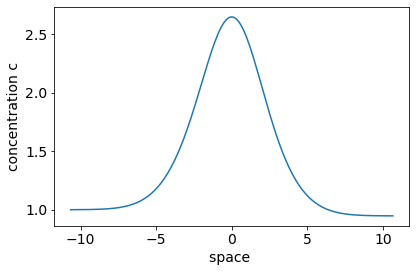

In [14]:
dist, v, I = calcvelocity(boundaryradius,sigma,vdiff,amplitude,vmin)
Darray = np.zeros(Nx)
Darray = v**2*taur/4# + D_0

c = np.zeros(Nx)        #array to save the density distributions
c[0] = 1

for i in range(0,Nx-1):
    c[i+1] = c[i]*(1+(1-Darray[i+1]/Darray[i])/2)
    #c[:] = c[:]#/sum(abs(c[:])*dx)   #Normalize
    
plt.clf()
plt.plot(x,c)
plt.xlabel('space ')
plt.ylabel('concentration c')
#plt.title('Time evolution')
#plt.ylim([0,1.1*np.amax(cin[:,1:])])
plt.tight_layout()  
#plt.savefig(str(title)+'.svg', format='svg')
#plt.show()

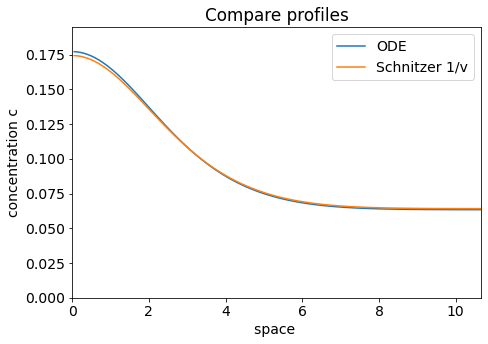

Check area under the curves
ODE: 1.0
Schnitzer: 1.0


In [15]:
fin = c[start:]#+1/(Nx*dx/2)*np.ones(int(Nx/2))
fin /= sum(fin)*dx   #normalized to 1

fig= plt.figure(figsize=(7,5))
plt.plot(x[start:],fin,label='ODE')
#plt.plot(x[start:],1/(Nx*dx/2)*np.ones(int(Nx/2)))
schnitzer = 1/v[start:]
schnitzer /= sum(schnitzer)*dx
plt.plot(x[start:],schnitzer,label='Schnitzer 1/v')
plt.ylim([0,1.1*max(fin[0],schnitzer[0])])
plt.xlim([0,boundaryradius])
plt.xlabel('space ')
plt.ylabel('concentration c')
plt.legend()
plt.title('Compare profiles')
plt.tight_layout()  
plt.savefig('Compare profiles.svg', format='svg')
plt.show()

print('Check area under the curves')
print('ODE:',round(sum(fin)*dx,2))
print('Schnitzer:',round(sum(schnitzer)*dx,2))